In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(y_test)

(60000, 10000)

In [4]:
##Changing Scale
X_train = X_train/255
X_test = X_test/255

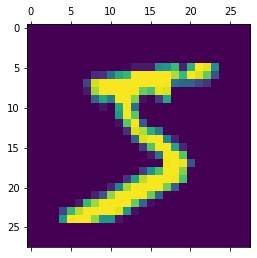

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape, 

((60000, 28, 28),)

In [8]:
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1]**2)
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1]**2)

In [9]:
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [10]:
model = keras.Sequential([
    keras.layers.Dense(700, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(X_train_flatten, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 21s 9ms/step - loss: 0.2169 - accuracy: 0.9382
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0777 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0252 - accuracy: 0.9922


In [12]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9798


[0.06800547987222672, 0.9797999858856201]

In [13]:
y_pred = model.predict(X_test_flatten)

In [14]:
y_pred_labels = list(map(lambda a: np.argmax(a), y_pred))

In [15]:
y_pred_labels[1] == y_test[1]

True

In [16]:
len(y_pred_labels), len(y_test)

(10000, 10000)

In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    1,    0,    2,    0,    1,    3,    1],
       [   1, 1127,    0,    2,    0,    2,    2,    0,    1,    0],
       [   2,    2, 1010,    4,    1,    0,    2,    3,    7,    1],
       [   0,    0,    1,  995,    0,    4,    0,    4,    2,    4],
       [   2,    0,    3,    0,  949,    0,    3,    3,    0,   22],
       [   2,    0,    0,    6,    1,  879,    1,    1,    1,    1],
       [   3,    2,    1,    1,    4,   20,  927,    0,    0,    0],
       [   1,    2,    5,    1,    0,    1,    0, 1005,    2,   11],
       [   1,    0,    2,   12,    3,   11,    1,    2,  936,    6],
       [   1,    2,    0,    1,    4,    2,    0,    1,    0,  998]])>

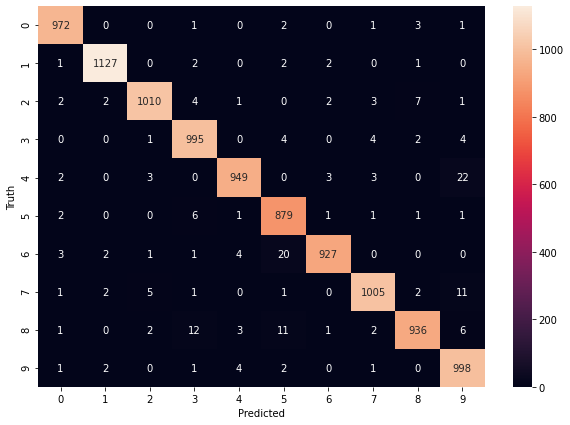

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()